# Event to conversion - Stox

# 1. Import

## 1.1 Data collection

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [2]:
events = pd.read_csv(r'C:\Users\Arthu\Documents\Stox\event_matrix_NL_complete.csv')

In [3]:
df = events

In [4]:
#splitting of the FULL_EVENT

df[['event', 'module', 'url']] = df['FULL_EVENT'].str.split('_', 2, expand=True)
df.head()

,FULL_EVENT,EVENT_COUNT,CUSTOMER_ID,EVENT_TEXT,event,module,url
0,Module Viewed_Tile Block_Kompressions-Laufsock...,1,3940523638881,Module Viewed,Module Viewed,Tile Block,Kompressions-Laufsocken Gegen Laufschmerzen Un...
1,Determine Checkout Language,1,3898800832609,Determine Checkout Language,Determine Checkout Language,None,None
2,Module Viewed_Featured Collection_Joúw Hardloo...,1,2546273484897,Module Viewed,Module Viewed,Featured Collection,Joúw Hardloopvoordeel: Hardloopsokken Met Comp...
3,Module Viewed_Product technology_STOX Daily Me...,2,3739707932769,Module Viewed,Module Viewed,Product technology,STOX Daily Merino Socks Herren- Farbe: Dunkelg...
4,Module Viewed_Product inspection_Sports Sokken...,10,3739707932769,Module Viewed,Module Viewed,Product inspection,Sports Sokken Mannen. Kleur: Blauw / Geel


In [6]:
#creation of the event_module part

event_module = []

for i, r in df.iterrows():
    if r['event'] == 'Module Viewed':
        event_module.append(r['event'] + "_" + r['module'])
    else:
        event_module.append(r['event'])

In [7]:
df['event_module'] = event_module

# 2. EDA

## 2.1 general exploration

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596511 entries, 0 to 596510
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   FULL_EVENT    594785 non-null  object
 1   EVENT_COUNT   596511 non-null  int64 
 2   CUSTOMER_ID   596511 non-null  object
 3   EVENT_TEXT    596511 non-null  object
 4   event         594785 non-null  object
 5   module        337753 non-null  object
 6   url           337753 non-null  object
 7   event_module  594785 non-null  object
dtypes: int64(1), object(7)
memory usage: 36.4+ MB


In [9]:
print(df.shape)
df.head()

(596511, 8)


,FULL_EVENT,EVENT_COUNT,CUSTOMER_ID,EVENT_TEXT,event,module,url,event_module
0,Module Viewed_Tile Block_Kompressions-Laufsock...,1,3940523638881,Module Viewed,Module Viewed,Tile Block,Kompressions-Laufsocken Gegen Laufschmerzen Un...,Module Viewed_Tile Block
1,Determine Checkout Language,1,3898800832609,Determine Checkout Language,Determine Checkout Language,None,None,Determine Checkout Language
2,Module Viewed_Featured Collection_Joúw Hardloo...,1,2546273484897,Module Viewed,Module Viewed,Featured Collection,Joúw Hardloopvoordeel: Hardloopsokken Met Comp...,Module Viewed_Featured Collection
3,Module Viewed_Product technology_STOX Daily Me...,2,3739707932769,Module Viewed,Module Viewed,Product technology,STOX Daily Merino Socks Herren- Farbe: Dunkelg...,Module Viewed_Product technology
4,Module Viewed_Product inspection_Sports Sokken...,10,3739707932769,Module Viewed,Module Viewed,Product inspection,Sports Sokken Mannen. Kleur: Blauw / Geel,Module Viewed_Product inspection


## 2.2 Occurence data

In [10]:
df_occ = pd.DataFrame(df['event_module'].value_counts())

df_occ.reset_index(inplace=True)
df_occ.columns = ['event_module','occurences']

print(df_occ)
df_occ.columns

                         event_module  occurences
0   Module Viewed_Featured Collection       93276
1            Module Viewed_Tile Block       56997
2    Module Viewed_Collection details       34194
3    Module Viewed_Product technology       32708
4         Determine Checkout Language       29670
..                                ...         ...
57              Amazon Button Clicked           6
58                Module Viewed_Media           3
59      Module Viewed_Product reviews           2
60      Module Viewed_Guarantee Block           1
61         Module Viewed_Review Block           1

[62 rows x 2 columns]


Index(['event_module', 'occurences'], dtype='object')

## 2.3 Predicted variable

In [11]:
conv_users = []
non_conv = []

for index, row in df.iterrows():
    if row['event_module'] == 'Order Completed':
        conv_users.append(row['CUSTOMER_ID'])
    else:
        non_conv.append(row['CUSTOMER_ID'])

conv_users = list(dict.fromkeys(conv_users))

        
print("converting users:" + str(len(set(conv_users))))
print("non-converting users:" + str(len(set(non_conv))))

converting users:24536
non-converting users:37188


# 3. Clean

## 3.1 Unnecessary columns
We remove the unnecessary columns that we will not use for this analysis.

In [12]:
df.drop(["EVENT_TEXT", "url","event", "FULL_EVENT", "module"], axis=1, inplace=True)

In [13]:
df.columns

Index(['EVENT_COUNT', 'CUSTOMER_ID', 'event_module'], dtype='object')

## 3.2 Legacy events

After some researches, we could say that the following factors existed only for test purpose and can be removed:
- Blog Post Seen
- Guarantee Viewed
- Reviews Viewed
- Review Page Seen
- Technology Page Seen


Because they are legacy:                      
- Module Viewed_About body           
- Module Viewed_About hero
- Module Viewed_Authority  
- Module Viewed_Blog hero             
- Module Viewed_Blog posts
- Module Viewed_Collection products
- Module Viewed_Guarantee Block
- Module Viewed_Hero Block
- Module Viewed_Information Block
- Module Viewed_Media
- Module Viewed_Media Block
- Module Viewed_Product reviews                    
- Module Viewed_Product form
- Module Viewed_Review Block 
- Module Viewed_Social
- Module Viewed_Store Reviews   
- Module Viewed_Usp Block

Was removed:
- Footer_Viewed:                    because we have 'Footer_clicked'
- Module Viewed_Tile Block:         useless to describe behavior

Was engineered:
- Module Viewed_Video Block + Module Viewed_Authority figures = Module Viewed_Middle Home Page
- Module Viewed_Showcase + Module Viewed_Introduction = Module Viewed_Top Home Page
- Module Viewed_Product inspection + Module Viewed_Product technology = Module Viewed_Middle Home Page

It was considered to remove the following, but they weren't:
- Product List Viewed:              it was a unique event of the collection page
- Email Capture Viewed:             96% of it is seen in the footer, which has its own event also triggered
- Search Clicked:                   We used Search Results Clicked as proxy of the search usefulness
- Module Viewed_Hero:               We consider that everyone saw it
- Category Page Viewed:             because we use, as proxy, Collection Clicked
- Collection Page Viewed:           because we use, as proxy, Collection Clicked  
- Module Viewed_Collection details: people scroll product page 
- Footer_Viewed:                    appears too correlated with multiple events
- Nav Clicked:                      same
- Module Viewed_Reviews:            same
- Module Viewed_Featured Collection:same

In [14]:
#list of element necessary for a conversion
nec_conv = ['Cart Viewed', 
            'Checkout Started', 
            'Checkout Step Viewed',
            'Determine Checkout Language',
            'Product Added', 
            'Product Clicked', 
            'Product Viewed']

#We need to drop all the rows that were only used for test purposes
test_events = ['Blog Post Seen',
               'Guarantee Viewed',
               'Review Page Seen', 
               'Reviews Viewed',
               'Technology Page Seen']               

legacy_events = ['Module Viewed_About body',
                 'Module Viewed_About hero', 
                 'Module Viewed_Authority',
                 'Module Viewed_Blog hero', 
                 'Module Viewed_Blog posts', 
                 'Module Viewed_Collection products',
                 'Module Viewed_Guarantee Block',
                 'Module Viewed_Hero Block',
                 'Module Viewed_Information Block',
                 'Module Viewed_Media',
                 'Module Viewed_Media Block', 
                 'Module Viewed_Product reviews',
                 'Module Viewed_Product form',
                 'Module Viewed_Review Block',
                 'Module Viewed_Quote Block',
                 'Module Viewed_Store Reviews', 
                 'Module Viewed_Usp Block']

removed_list = ['Amazon Button Clicked',
                'Footer Viewed',
                'Module Viewed_Tile Block']

#final list
final_list = nec_conv + test_events + legacy_events + removed_list

## 3.3 Country_specific

Warnings:
The following list has a too high level of correlation to be kept (name + VIF):
- Collection Clicked  5.203669

In [15]:
del_event = ['Collection Clicked']

final_list = final_list + del_event

df2 = df[~df.event_module.isin(final_list)]

# 4. Statistical logistic regression

It seems that doing ML on the Jupyter has reached its limit. So I will work from a pure stastical point of view to get the results.

The assumptions are:
- Binary logistic regression requires the dependent variable to be binary.
- For a binary regression, the factor level 1 of the dependent variable should represent the desired outcome.
- Only the meaningful variables should be included.
- The independent variables should be independent of each other. That is, the model should have little or no multicollinearity.
- The independent variables are linearly related to the log odds. (~ means excluding due to p-values)
- Logistic regression requires quite large sample sizes.

## 4.1 Dummification

In [16]:
pivot = df2.pivot_table(index='CUSTOMER_ID', columns='event_module', values='EVENT_COUNT')
pivot.fillna(0,inplace=True)

In [17]:
pivot.head()

event_module,Accordion Clicked,Announcement Clicked,Blog Post Clicked,Blog Post Viewed,Blogpage Hero Clicked,Carousel Clicked,Collection Anchor Clicked,Collection Gender Selected,Color Selected,Currency Selected,...,Order Completed,Product Info Clicked,Product Removed,Product Zoom Clicked,Review Anchor Clicked,Review Page Viewed,Search Result Clicked,Size Variant Selected,Technology Page Viewed,Video Opened
CUSTOMER_ID,,,,,,,,,,,,,,,,,,,,,
00271de1-6214-4f20-a773-2265eca850a4,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0
0032e0c9-8ba0-4fea-9057-32fddf0c7070,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0
003b8fc1-7df8-405c-ad90-032dc8502c26,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
003e3481-465d-4809-a70c-922c076929ad,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
004f7508-8b4e-4139-8c8a-10f6e128a447,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
pivot.shape

(35543, 48)

## 4.2 multicolinearity

We use the Variance Inflation Factor results. A VIF above 5 means high multicollinearity.

The interpretation of a regression coefficient is that it represents the mean change in the dependent variable for each 1 unit change in an independent variable when you hold all of the other independent variables constant. That last portion is crucial for our discussion about multicollinearity.

If two variables have high multicollinearity, it will highly influence on the p-value and any slight change in the model might create highly different results. But it doensn't overall affect the prediction power, only the weights and p-value.

source: https://statisticsbyjim.com/regression/multicollinearity-in-regression-analysis/

To go further with PCA and Ridge: https://www.researchgate.net/post/How_do_I_minimize_multicollinearity_in_multiple_regression_analysis

In [19]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 

def high_vif_pivot(pivot):
    global y
    global X
    y = pivot['Order Completed']
    X = pivot.drop(['Order Completed'], axis=1)
    vif_data = pd.DataFrame() 
    vif_data["feature"] = X.columns 
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))] 
    global high_vif
    high_vif = vif_data[vif_data['VIF']>5]
    print(high_vif)
    
    

In [20]:
def most_inf_factors(high_vif, X):
    corr = X.corr().abs()
    corr.reset_index(inplace=True)
    corr_c = corr[corr.event_module.isin(high_vif['feature'])]
    print("this is corr_c shape: "+str(corr_c.shape))
    corr_c = corr_c.replace(1.0, 0.0)
    list_max = []
    list_name_max = []
    value_only = corr_c[corr_c.columns[1:]]
    for index, row in value_only.iterrows():
        list_max.append(row.max())
        list_name_max.append(row.idxmax())
    corr_c['list_max'] = list_max
    corr_c['list_name_max'] = list_name_max
    print(corr_c[['event_module', 'list_max', 'list_name_max']])

In [21]:
high_vif_pivot(pivot)

                       feature       VIF
26  Module Viewed_Introduction  5.330595
32   Module Viewed_Video Block  5.797103


In [22]:
most_inf_factors(high_vif,X)

this is corr_c shape: (2, 48)
event_module                event_module  list_max  \
26            Module Viewed_Introduction  0.819195   
32             Module Viewed_Video Block  0.868083   

event_module                    list_name_max  
26                     Module Viewed_Showcase  
32            Module Viewed_Authority figures  


## 4.3 Feature engineering

In [23]:
pivot['Module Viewed_Middle Home Page'] = pivot['Module Viewed_Video Block'] + pivot['Module Viewed_Authority figures']
pivot['Module Viewed_Top Home Page'] = pivot['Module Viewed_Showcase'] + pivot['Module Viewed_Introduction']
pivot['Module Viewed_Middle Product Page'] = pivot['Module Viewed_Product inspection'] + pivot['Module Viewed_Product technology'] + pivot['Module Viewed_Reviews']

pivot.drop(['Module Viewed_Video Block', 'Module Viewed_Authority figures' 
            ,'Module Viewed_Showcase', 'Module Viewed_Introduction' 
            ,'Module Viewed_Product inspection', 'Module Viewed_Product technology','Module Viewed_Reviews'
           ], 
           axis=1, inplace = True)
print(pivot.shape)

(35543, 44)


In [24]:
high_vif_pivot(pivot)

Empty DataFrame
Columns: [feature, VIF]
Index: []


Our list of high-vif value is empty, so we can now model

# 5. Modelling
Now let's regress our logistic regression.

In [25]:
y = []

In [26]:
for i in pivot['Order Completed']:
    if i >= 1:
        y.append(1)
    else:
        y.append(0)
        
X = pivot.drop(['Order Completed'], axis=1)

X=sm.add_constant(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [27]:
print(y.count(1))
print(y.count(0))

24536
11007


In [28]:
model=sm.Logit(y_train,X_train,random_state=0)
result=model.fit(max_iter=40, method='bfgs')

         Current function value: 0.535049
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


C:\Users\Arthu\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [29]:
opt_thr=0.5
y_pred=result.predict(X_test)
y_pred= np.where(y_pred>opt_thr,1,0)

Text(33.0, 0.5, 'Actual Output')

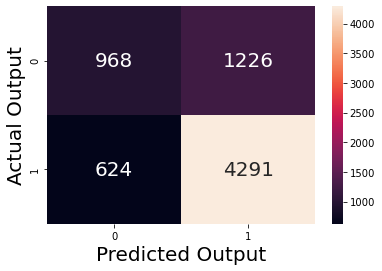

In [30]:
cm= confusion_matrix(y_test,y_pred)
ax=sns.heatmap(cm, annot=True, fmt="0", annot_kws={"size":20})
plt.xlabel('Predicted Output', fontsize=20)
plt.ylabel('Actual Output', fontsize=20)

In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.61      0.44      0.51      2194
           1       0.78      0.87      0.82      4915

    accuracy                           0.74      7109
   macro avg       0.69      0.66      0.67      7109
weighted avg       0.73      0.74      0.73      7109



Accuracy = (TP+TN) /(TP+FP+FN+TN)
And we have an accuracy of 82%

In [32]:
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                28434
Model:                          Logit   Df Residuals:                    28390
Method:                           MLE   Df Model:                           43
Date:                Tue, 02 Mar 2021   Pseudo R-squ.:                  0.1357
Time:                        09:06:28   Log-Likelihood:                -15214.
converged:                      False   LL-Null:                       -17602.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -0.1535      0.022     -6.929      0.000      -0.197      -0.110
Accordion Clicked                     0.0007      0.010      0

In [33]:
# Fetching the statistics
stat_df=pd.DataFrame({'coefficients':result.params, 'p-value': result.pvalues, 'odds_ratio': np.exp(result.params)})
final = stat_df[['coefficients','p-value']]

final.reset_index(inplace=True)
final.columns = ['event', 'coefficients', 'p-value']

#dropped const
final.drop(0, inplace=True)

C:\Users\Arthu\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [34]:
#merging with occurences
final = final.merge(df_occ, left_on = 'event', right_on = 'event_module', how='left')
final.drop('event_module', axis=1, inplace = True)
print(final)

                                event  coefficients       p-value  \
0                   Accordion Clicked      0.000705  9.463222e-01   
1                Announcement Clicked     -0.065328  3.150896e-01   
2                   Blog Post Clicked      0.459243  1.150928e-03   
3                    Blog Post Viewed     -0.202909  1.107994e-46   
4               Blogpage Hero Clicked      0.018797  9.808424e-01   
5                    Carousel Clicked     -0.020764  1.342220e-01   
6           Collection Anchor Clicked     -0.069170  2.780377e-01   
7          Collection Gender Selected      0.019076  2.953494e-02   
8                      Color Selected      0.024091  4.499287e-13   
9                   Currency Selected     -0.037024  7.822722e-01   
10               Email Capture Closed     -0.027872  8.295063e-01   
11            Email Capture Submitted     -0.182337  1.463313e-01   
12                  Experiment Viewed      0.012933  8.980034e-11   
13                     Footer Clic

In [35]:
Middle_Home_Page_list = ['Module Viewed_Video Block', 'Module Viewed_Authority figures']
Top_Home_Page_list = ['Module Viewed_Showcase', 'Module Viewed_Introduction']
Middle_Product_Page_list = ['Module Viewed_Product inspection','Module Viewed_Product technology','Module Viewed_Reviews']
    
MHP = df_occ[df_occ['event_module'].isin(Middle_Home_Page_list)]
max_MHP = MHP['occurences'].max()

THP = df_occ[df_occ['event_module'].isin(Top_Home_Page_list)]
max_THP = THP['occurences'].max()

MPP = df_occ[df_occ['event_module'].isin(Middle_Product_Page_list)]
max_MPP = MPP['occurences'].max()

In [37]:
#adding occurences of engineered features

final.at[40, 'occurences'] = max_MHP
final.at[41, 'occurences'] = max_THP
final.at[42, 'occurences'] = max_MPP
print(final)

                                event  coefficients       p-value  \
0                   Accordion Clicked      0.000705  9.463222e-01   
1                Announcement Clicked     -0.065328  3.150896e-01   
2                   Blog Post Clicked      0.459243  1.150928e-03   
3                    Blog Post Viewed     -0.202909  1.107994e-46   
4               Blogpage Hero Clicked      0.018797  9.808424e-01   
5                    Carousel Clicked     -0.020764  1.342220e-01   
6           Collection Anchor Clicked     -0.069170  2.780377e-01   
7          Collection Gender Selected      0.019076  2.953494e-02   
8                      Color Selected      0.024091  4.499287e-13   
9                   Currency Selected     -0.037024  7.822722e-01   
10               Email Capture Closed     -0.027872  8.295063e-01   
11            Email Capture Submitted     -0.182337  1.463313e-01   
12                  Experiment Viewed      0.012933  8.980034e-11   
13                     Footer Clic

In [39]:
#creating % occurence column
sum_occ = sum(final['occurences'])

final['% occurence'] = final['occurences'] / sum_occ * 100

print(final)

                                event  coefficients       p-value  occurences  \
0                   Accordion Clicked      0.000705  9.463222e-01      6886.0   
1                Announcement Clicked     -0.065328  3.150896e-01       847.0   
2                   Blog Post Clicked      0.459243  1.150928e-03       182.0   
3                    Blog Post Viewed     -0.202909  1.107994e-46      3863.0   
4               Blogpage Hero Clicked      0.018797  9.808424e-01        13.0   
5                    Carousel Clicked     -0.020764  1.342220e-01     10713.0   
6           Collection Anchor Clicked     -0.069170  2.780377e-01      1398.0   
7          Collection Gender Selected      0.019076  2.953494e-02     16354.0   
8                      Color Selected      0.024091  4.499287e-13     18588.0   
9                   Currency Selected     -0.037024  7.822722e-01        88.0   
10               Email Capture Closed     -0.027872  8.295063e-01       804.0   
11            Email Capture 

In [40]:
# List significant parameters
significant_params=stat_df[stat_df['p-value']<=0.1].index
significant_params= significant_params.drop('const')
significant_params

Index(['Blog Post Clicked', 'Blog Post Viewed', 'Collection Gender Selected',
       'Color Selected', 'Experiment Viewed', 'Homepage Hero Clicked',
       'Language Selected', 'Load More Reviews', 'Location Selected',
       'Module Viewed_Collection details', 'Module Viewed_Featured Collection',
       'Module Viewed_Guarantee', 'Module Viewed_Hero',
       'Module Viewed_Social Sharing', 'Nav Clicked', 'Nav Closed',
       'Nav Opened', 'Notification Viewed', 'Product Removed',
       'Size Variant Selected'],
      dtype='object')

In [41]:
# significant parameters and their coefficient
print('Total number of parameters: %s '%len(X.keys()) )
print('Number of Significant Parameters: %s'%(len(significant_params)))
final_stat_df = stat_df.loc[significant_params].sort_values('coefficients', ascending=False)['coefficients']
print(final_stat_df)

Total number of parameters: 44 
Number of Significant Parameters: 20
Blog Post Clicked                    0.459243
Module Viewed_Featured Collection    0.450111
Module Viewed_Collection details     0.329674
Nav Clicked                          0.176455
Module Viewed_Hero                   0.078245
Nav Closed                           0.076667
Homepage Hero Clicked                0.059546
Size Variant Selected                0.055855
Color Selected                       0.024091
Collection Gender Selected           0.019076
Load More Reviews                    0.018928
Experiment Viewed                    0.012933
Location Selected                   -0.044976
Module Viewed_Guarantee             -0.078154
Product Removed                     -0.110802
Module Viewed_Social Sharing        -0.144166
Nav Opened                          -0.197553
Blog Post Viewed                    -0.202909
Notification Viewed                 -0.254799
Language Selected                   -0.603937
Name: coeff

In [42]:
final.columns

Index(['event', 'coefficients', 'p-value', 'occurences', '% occurence'], dtype='object')

In [43]:
event_matrix_NL_final_section = pd.DataFrame(final)
print(event_matrix_NL_final_section)

                                event  coefficients       p-value  occurences  \
0                   Accordion Clicked      0.000705  9.463222e-01      6886.0   
1                Announcement Clicked     -0.065328  3.150896e-01       847.0   
2                   Blog Post Clicked      0.459243  1.150928e-03       182.0   
3                    Blog Post Viewed     -0.202909  1.107994e-46      3863.0   
4               Blogpage Hero Clicked      0.018797  9.808424e-01        13.0   
5                    Carousel Clicked     -0.020764  1.342220e-01     10713.0   
6           Collection Anchor Clicked     -0.069170  2.780377e-01      1398.0   
7          Collection Gender Selected      0.019076  2.953494e-02     16354.0   
8                      Color Selected      0.024091  4.499287e-13     18588.0   
9                   Currency Selected     -0.037024  7.822722e-01        88.0   
10               Email Capture Closed     -0.027872  8.295063e-01       804.0   
11            Email Capture 

In [44]:
event_matrix_NL_final_section.to_excel('event_matrix_NL_final_section.xlsx')